In [2]:
import pandas as pd

In [3]:
def network_file_to_df(path:str, col_left:str ,col_right:str, sep=':' ):
    data = []

    with open(path, 'r', encoding="utf8") as file:
        for line in file:
            try:
                index, item = line.strip().split(sep, maxsplit=1)
                data.append(
                    {col_left:index, col_right:item.strip()}
                    )  
            except:
                print('Error:',line)
    
    return pd.DataFrame(data)

In [4]:
vertex_df = network_file_to_df('data/vertex.txt','vertex','character')
vertex_df['index'] = vertex_df.vertex.str.extract('(\d+)').astype(int)
vertex_df.head()

,vertex,character,index
0,Vertex 1,24-HOUR MAN/EMMANUEL,1
1,Vertex 2,3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER,2
2,Vertex 3,4-D MAN/MERCURIO,3
3,Vertex 4,8-BALL/,4
4,Vertex 5,A,5


In [5]:
len(vertex_df)

6486

In [7]:
book_df = network_file_to_df('data/books.txt','vertex','book')
book_df['index'] = book_df.vertex.str.extract('(\d+)').astype(int)
book_df.head()

,vertex,book,index
0,Vertex 6487,AA2 35,6487
1,Vertex 6488,M/PRM 35,6488
2,Vertex 6489,M/PRM 36,6489
3,Vertex 6490,M/PRM 37,6490
4,Vertex 6491,WI? 9,6491


In [8]:
len(book_df)

12942

In [31]:
edges_raw_df = network_file_to_df('data/edges.txt','character','book', sep=" ")
edges_raw_df.head()

,character,book
0,1,6487
1,2,6488 6489 6490 6491 6492 6493 6494 6495 6496
2,3,6497 6498 6499 6500 6501 6502 6503 6504 6505
3,4,6506 6507 6508
4,5,6509 6510 6511


In [32]:
len(edges_raw_df)

11090

In [33]:
edges_raw_df['book'] = edges_raw_df['book'].apply(lambda x: x.split())
edges_df = edges_raw_df.explode('book')
edges_df.reset_index(drop=True, inplace=True)

In [24]:
edges_df.head()

,character,book
0,1,6487
1,2,6488
2,2,6489
3,2,6490
4,2,6491


In [34]:
len(edges_df)

96662

In [25]:
edges_df.groupby('book').count().mean()

character    7.468861
dtype: float64

In [26]:
edges_df.groupby('character').count().mean()

book    14.903176
dtype: float64

In [75]:
edges_df

,character,book
0,1,6487
1,2,6488
2,2,6489
3,2,6490
4,2,6491
...,...,...
96657,6482,15336
96658,6483,18709
96659,6484,18709
96660,6485,15336


In [76]:
#print(edges_df.to_string(index=False))

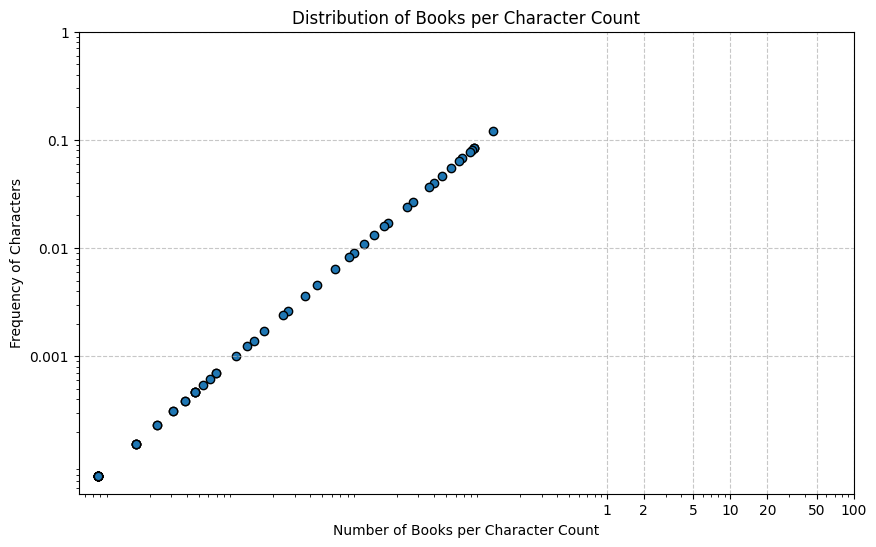

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of unique characters per book
char_count_per_book = edges_df.groupby('book')['character'].nunique()

# Count the number of books for each unique character count
book_count_per_char_count = char_count_per_book.value_counts( normalize=True).reset_index()
book_count_per_char_count.columns = ['num_characters', 'num_books']

# Frequency (normalized)
book_count_per_char_count['frequency'] = book_count_per_char_count['num_books'] / book_count_per_char_count['num_books'].sum()

# Create the scatter plot
plt.figure(figsize=[10, 6])
plt.scatter(book_count_per_char_count['num_books'], book_count_per_char_count['frequency'], edgecolor='black')
plt.xlabel('Number of Books per Character Count')
plt.ylabel('Frequency of Characters')
plt.xscale('log')
plt.yscale('log')

# Optional: Set specific tick marks
x_ticks = [1, 2, 5, 10, 20, 50, 100]  # Adjust based on your data range
y_ticks = [0.001, 0.01, 0.1, 1]  # Adjust based on your data range
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)

plt.title('Distribution of Books per Character Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


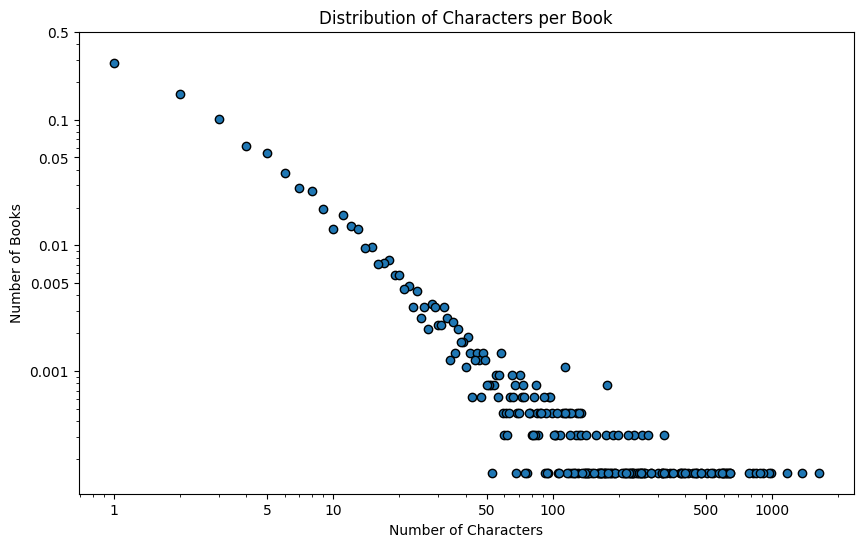

In [86]:
import matplotlib.pyplot as plt
#character
# Calculate the number of unique characters per book
char_count_per_book = edges_df.groupby('character')['book'].nunique()

# Create a DataFrame for plotting, counting the number of books for each unique character count
plot_data = char_count_per_book.value_counts().reset_index()
plot_data.columns = ['num_characters', 'num_books']

# Create the scatter plot
plt.figure(figsize=[10, 6])
plt.scatter(plot_data['num_characters'], plot_data['num_books']/plot_data['num_books'].sum(), edgecolor='black')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Books')
# Applying log scale
plt.xscale('log')
plt.yscale('log')

# Set specific tick marks
x_ticks = [1, 5, 10, 50, 100,500,1000]
y_ticks = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)

plt.title('Distribution of Characters per Book')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [58]:
# frequency of books (pandas Series)
frequency_of_books =edges_df['book'].value_counts(normalize=True).reset_index()
frequency_of_books

,book,proportion
0,6496,0.001148
1,7700,0.000941
2,7694,0.000931
3,7109,0.000900
4,7702,0.000828
...,...,...
12937,11295,0.000010
12938,11296,0.000010
12939,11297,0.000010
12940,11298,0.000010


In [56]:
# Number of characters per book (pandas Series)
num_characters = edges_df.groupby('book').agg(frequency_character=('character', 'count')).reset_index()
num_characters

,book,frequency_character
0,10000,8
1,10001,11
2,10002,9
3,10003,9
4,10004,8
...,...,...
12937,9995,4
12938,9996,5
12939,9997,6
12940,9998,8


In [69]:
num_characters.sort_values('frequency_character', ascending=False)

,book,frequency_character
9438,6496,111
10642,7700,91
10636,7694,90
10051,7109,87
10644,7702,80
...,...,...
9109,19109,1
9110,19110,1
9111,19111,1
9114,19114,1


In [59]:
merged_df = pd.merge(frequency_of_books, num_characters, on='book')
merged_df

,book,proportion,frequency_character
0,6496,0.001148,111
1,7700,0.000941,91
2,7694,0.000931,90
3,7109,0.000900,87
4,7702,0.000828,80
...,...,...,...
12937,11295,0.000010,1
12938,11296,0.000010,1
12939,11297,0.000010,1
12940,11298,0.000010,1


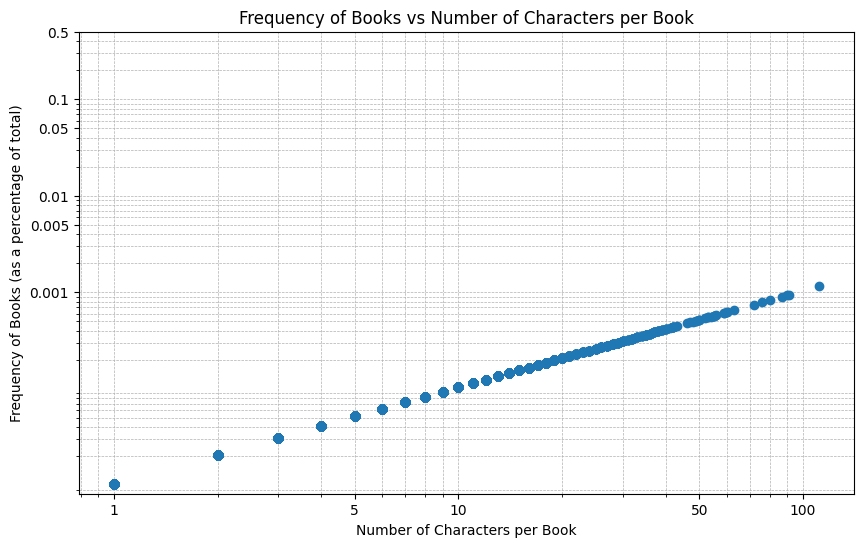

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'merged_df' is your DataFrame and is sorted by 'frequency_character' or 'proportion'
# If not, you should sort it before plotting
merged_df = merged_df.sort_values(by='frequency_character')

# Plotting
plt.figure(figsize=[10, 6])  # You can adjust the figure size as needed
plt.scatter(merged_df['frequency_character'], merged_df['proportion'], zorder=3)  # Zorder for plotting points above the line
plt.xlabel('Number of Characters per Book')
plt.ylabel('Frequency of Books (as a percentage of total)')
plt.title('Frequency of Books vs Number of Characters per Book')
plt.grid(True, which="both", ls="--", lw=0.5)  # Grid with dashed lines

# Applying log scale
plt.xscale('log')
plt.yscale('log')

# Set specific tick marks
x_ticks = [1, 5, 10, 50, 100]
y_ticks = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)
plt.minorticks_on()  # Show minor ticks

# Add this line if you want to show minor ticks in logarithmic scale
plt.minorticks_on()


plt.show()


In [27]:
merged_df = pd.merge(edges_df, edges_df, on='book')

In [28]:
'-'.join(map(lambda c:str(c),sorted([1987,1])))

'1-1987'

In [29]:
str([123,456])

'[123, 456]'

In [30]:
merged_df['relation_key'] = merged_df.apply(lambda row: str(sorted((row['character_x'], row['character_y']))), axis=1)


In [66]:
merged_df

,character_x,book,character_y,relation_key
0,1,6487,1,"['1', '1']"
1,1,6487,1999,"['1', '1999']"
2,1,6487,6459,"['1', '6459']"
3,1,6487,6463,"['1', '6463']"
4,1,6487,6464,"['1', '6464']"
...,...,...,...,...
1236197,6485,15336,6486,"['6485', '6486']"
1236198,6486,15336,1582,"['1582', '6486']"
1236199,6486,15336,6482,"['6482', '6486']"
1236200,6486,15336,6485,"['6485', '6486']"


In [67]:
filtered_df = merged_df[merged_df['character_x'] != merged_df['character_y']]
filtered_df

,character_x,book,character_y,relation_key
1,1,6487,1999,"['1', '1999']"
2,1,6487,6459,"['1', '6459']"
3,1,6487,6463,"['1', '6463']"
4,1,6487,6464,"['1', '6464']"
5,1,6487,6471,"['1', '6471']"
...,...,...,...,...
1236195,6485,15336,6482,"['6482', '6485']"
1236197,6485,15336,6486,"['6485', '6486']"
1236198,6486,15336,1582,"['1582', '6486']"
1236199,6486,15336,6482,"['6482', '6486']"


In [68]:
unique_df = filtered_df.drop_duplicates(subset=['relation_key', 'book'])
unique_df

,character_x,book,character_y,relation_key
1,1,6487,1999,"['1', '1999']"
2,1,6487,6459,"['1', '6459']"
3,1,6487,6463,"['1', '6463']"
4,1,6487,6464,"['1', '6464']"
5,1,6487,6471,"['1', '6471']"
...,...,...,...,...
1236181,6481,18709,6484,"['6481', '6484']"
1236184,6482,15336,6485,"['6482', '6485']"
1236185,6482,15336,6486,"['6482', '6486']"
1236189,6483,18709,6484,"['6483', '6484']"


In [69]:
unique_df.query('book == "6521"')

,character_x,book,character_y,relation_key
450,10,6521,1535,"['10', '1535']"
451,10,6521,1572,"['10', '1572']"
452,10,6521,2548,"['10', '2548']"
453,10,6521,3198,"['10', '3198']"
454,10,6521,4759,"['10', '4759']"
274060,1535,6521,1572,"['1535', '1572']"
274061,1535,6521,2548,"['1535', '2548']"
274062,1535,6521,3198,"['1535', '3198']"
274063,1535,6521,4759,"['1535', '4759']"
277959,1572,6521,2548,"['1572', '2548']"


In [ ]:
'data/edges.txt'

In [52]:
data = []

with open('data/vertex.txt', 'r', encoding="utf8") as file:
    for line in file:
        try:
            index, item = line.strip().split(':', maxsplit=1)
            data.append(item.strip())  
        except:
            print('Error:',line)
              

In [116]:
len(data)

6486

In [59]:
books = []

with open('data/books.txt', 'r', encoding="utf8") as file:
    for line in file:
        try:
            index, book = line.strip().split(':', maxsplit=1)
            books.append(book.strip())  
        except Exception as e:
            print(str(e))
            print('Error:',line)
              

In [117]:
len(books)

12942

In [99]:
edges = {}
i = 1
with open('data/edges.txt', 'r', encoding="utf8") as file:
    for line in file:
        try:
            if i ==10:
                pass
                #break
            _character, _books = line.strip().split(' ', maxsplit=1)
            _books_arr = _books.split(' ')

            current_books = edges.get(_character, [])
            # Extend the current list of books with the new ones
            current_books.extend(_books_arr)
            # Put the updated list of books back in the dictionary
            edges[_character] = current_books

            i= i+1
        except Exception as e:
            print(str(e))
            print('Error:',line)
              

In [113]:
len(edges)

6486

In [118]:
acc = []
for e in edges:
    acc.append(len(edges[e]))
    #continue
    #print(e,edges[e][0])

In [121]:
sum(acc)/len(acc)

14.903176071538699

In [122]:
len(spider)

1625

In [108]:
cap =edges['859']
spider =edges['5306']

In [110]:
inter  = set.intersection(set(cap), set(spider))

In [114]:
len(inter)

145

In [111]:
len(inter)/len(spider)

0.08923076923076922

In [112]:
len(inter)/len(cap)

0.10607168983174835

In [ ]:
859

In [107]:
edges['5306']

['14957',
 '17232',
 '19036',
 '18528',
 '18529',
 '18530',
 '18532',
 '18531',
 '17646',
 '17869',
 '18584',
 '18449',
 '16181',
 '14611',
 '19037',
 '16592',
 '16418',
 '12201',
 '9247',
 '18536',
 '19038',
 '18393',
 '18537',
 '12419',
 '18538',
 '18539',
 '9248',
 '18540',
 '12204',
 '9249',
 '10191',
 '13813',
 '17194',
 '17195',
 '17791',
 '19039',
 '15453',
 '8070',
 '17792',
 '15346',
 '9003',
 '17206',
 '8039',
 '14243',
 '9250',
 '9251',
 '17793',
 '16724',
 '17210',
 '8042',
 '15858',
 '14956',
 '9252',
 '7409',
 '12202',
 '10678',
 '9253',
 '9254',
 '9255',
 '9256',
 '9257',
 '15454',
 '12203',
 '9258',
 '9259',
 '9260',
 '9261',
 '17794',
 '17418',
 '16017',
 '17419',
 '17420',
 '8062',
 '13814',
 '13812',
 '11385',
 '7272',
 '12338',
 '16595',
 '7418',
 '17421',
 '15983',
 '16596',
 '7420',
 '8073',
 '16597',
 '16018',
 '17795',
 '17422',
 '7424',
 '8085',
 '10443',
 '15984',
 '17222',
 '14616',
 '12820',
 '17423',
 '7426',
 '10679',
 '16598',
 '10680',
 '10681',
 '14462'

In [53]:
len(data)

6486

In [60]:
len(books)

12942

In [70]:
e = pd.read_csv('data/edges.csv') # Edges
h = pd.read_csv('data/hero-network.csv') # Hero
n = pd.read_csv('data/nodes.csv') # Nodes

In [71]:
h

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [35]:
e

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [ ]:
SPIDER-MAN/PETER PAR = 5306

In [115]:
h[h.hero1.str.contains('SPIDER')&h.hero2.str.contains('CAPTAIN AMERICA')]

,hero1,hero2
9244,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA
18867,SPIDER-WOMAN II/JULI,CAPTAIN AMERICA
21028,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA
21160,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA
21201,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA
...,...,...
558679,SPIDER-WOMAN II/JULI,CAPTAIN AMERICA
567823,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA
569918,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA
571002,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA


In [72]:
h.query("hero1 == 'SPIDER-MAN'")

,hero1,hero2


In [ ]:
TTA

In [70]:
n.query('node == "TTA 90/2"')

,node,type
16779,TTA 90/2,comic


In [56]:
n.query('type == "comic"').sample(15)

,node,type
1097,ASM 1,comic
15657,T 197,comic
15066,ST2 7,comic
17255,UX 361,comic
1626,AT 9,comic
415,A 42,comic
15736,T 241,comic
13078,PWJ 16,comic
639,AF 33,comic
9670,M/CP 115,comic


* dataset 1

In [38]:
e.hero.nunique()

6439

In [23]:
len(e)

96104

In [30]:
len(n)

19090

In [32]:
len(h)

574467

In [29]:
e.groupby('hero').count().reset_index().sort_values('comic', ascending=False).head()

,hero,comic
5299,SPIDER-MAN/PETER PARKER,1577
857,CAPTAIN AMERICA,1334
2654,IRON MAN/TONY STARK,1150
5708,THING/BENJAMIN J. GR,963
5730,THOR/DR. DONALD BLAK,956


In [20]:
e.query("hero == 'CAPTAIN AMERICA'")

,hero,comic
11116,CAPTAIN AMERICA,A '00
11117,CAPTAIN AMERICA,A 1
11118,CAPTAIN AMERICA,A 10
11119,CAPTAIN AMERICA,A 100
11120,CAPTAIN AMERICA,A 101
...,...,...
12485,CAPTAIN AMERICA,XF 139
12486,CAPTAIN AMERICA,XF 6
12487,CAPTAIN AMERICA,XF 66
12488,CAPTAIN AMERICA,XM 46


In [18]:
1334/6439

0.20717502717813324

In [17]:
len(e.hero.unique().tolist())

6439

In [13]:
e.hero.unique().tolist()

['24-HOUR MAN/EMMANUEL',
 '3-D MAN/CHARLES CHAN',
 '4-D MAN/MERCURIO',
 '8-BALL/',
 'ABBOTT, JACK',
 'ABCISSA',
 'ABEL',
 'ABOMINATION/EMIL BLO',
 'ABOMINATION | MUTANT',
 'ABOMINATRIX',
 'ABRAXAS',
 'ABSALOM',
 'ABSORBING MAN/CARL C',
 'ABSORBING MAN | MUTA',
 'ACBA',
 'ACHEBE, REVEREND DOC',
 'ACHILLES II/HELMUT',
 'ACHILLES',
 'ACROBAT/CARL ZANTE',
 'ADAM 3,031',
 'ADAMS, CINDY',
 'ADAMS, CONGRESSMAN H',
 'ADAMS, GEORGE',
 'ADAMS, MARTHA',
 'ADAMS, NICOLE NIKKI',
 'ADAMSON, JASON',
 'ADAMSON, REBECCA',
 'ADAM X',
 'ADMIRAL PROTOCOL/',
 'ADORA',
 'ADORA CLONE',
 'ADRIA',
 'ADVA',
 'ADVENT/KYLE GROBE',
 'ADVERSARY',
 'AEGIS/TREY ROLLINS',
 'AENTAROS',
 'AFTERLIFE',
 'AGAMEMNON II/ANDREI',
 'AGAMEMNON III/',
 'AGAMEMNON',
 'AGAMOTTO',
 'AGARN, CAPT.',
 'AGED GENGHIS',
 'AGEE, DR. AUBREY',
 'AGEE, REBECCA',
 'AGENT 18/JACK TRUMAN',
 'AGENT AXIS/',
 'AGENT-X/',
 'AGGAMON',
 'AGINAR',
 'AGON',
 'AGONY/',
 'AGUIRRE, ISOBEL',
 'AHAB/RORY CAMPBELL',
 'AHQLAU',
 'AHURA',
 'AI-CHIA',
 'AINET',

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Replace 'yourfile.net' with the path to your actual .net file
net_file = 'marvel.net'

# Reading the .net file
G = nx.read_gexf('hero.gephi')



ParseError: not well-formed (invalid token): line 1, column 2 (<string>)